<a href="https://colab.research.google.com/github/nselem/2025LitiVisit/blob/main/250917_01_EMP_CreatingITSBiomFungalV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ISMB 2024 Tutorial: Multi-omic data integration for microbiome research using scikit-bio

# Section 03: Working with various omic data types

We aim to explore ITS fro, EMP biom files; for that goal; here qre the ids of the bio, files; already in the shared drive

These contain ITS in the sequencing technology:
104012
104405
104910
104922
104929
133034
133098
134363
134413
134461

Goals
   - [x] Open global metadata
   - [x] Explore one biom
   - [x] Search for Sacharomyces
   - [x] HAve a visualization by biom
   
   - [ ] Include and Combine all bio,s
   - [ ] Search from them who have shotgun
   - [ ] Combine them
   - [ ] Search a visualization from shotgun
   - [ ] Give the numbers to Alberto so he can run kraken and compare

[**Omics**](https://en.wikipedia.org/wiki/Omics) refer to the studies of the totality of biological entities within a system. They usually employ high-throughput techniques, such as DNA sequencing and mass spectrometry, to generate information about all molecules, genes, cells, organisms, and more. This information can be analyzed using bioinformatics methods to inform the structure, function and dynamics of the biological entities.

In microbiome research, because isolating and cultivating all microbes in a habitat is usually infeasible, omics are essential tools to characterize the microbiome (the name of which already indicates this nature). The prefix "**meta**-" is usually added to an omic to indicate the study of biological entities from all microorganisms within the environment (e.g., [metagenomics](https://en.wikipedia.org/wiki/Metagenomics)). Omics for microbiota can be employed in combination with omics for their host or the environment to profile a more comprehensive image of the biological system.

Depending on the biological molecules it studies, the most common omics for host and microbiota include:

- Molecule: DNA - mRNA - protein - metabolite
- (Host) ome: genome - transcriptome - proteome - metabolome
- (Microbiota) ome: metagenome - metatranscriptome - metaproteome - (meta)metabolome

In this section, we will use a real-world study -- the **Earth Microbiome Project 500** ([EMP500](https://earthmicrobiome.org/emp500/)), as an example to explore various omic data types. We will navigate the data tables and relevant data files associated with individual omics, discuss the unique challenges and solutions in working with omic data, and compare between omic data types. This process will support the analyses in all subsequent sections.

## Preparation

Install the latest version of scikit-bio if it hasn't been (needed for every Google Colab instance).

In [2]:
from importlib.util import find_spec

In [3]:
if find_spec('skbio') is None:
    !pip install -q scikit-bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 83.2 MB/s eta 0:00:00


In [4]:
import skbio
skbio.__version__

'0.7.0'

Import common libraries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

If you use Google Colab, and would like to directly mount the shared Google Drive folder containing data files, please uncomment and execute the following code.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# # Specify your remote directory
HOME = '/content/drive/MyDrive/sci-kit-bio_local/Data/emp500'

Check if the directory exists by listing its content.

In [20]:
!ls $HOME

amplicon  assembly  masspec  README.md	sample.tsv  shotgun


## The EMP500 study

A `README.md` file within the data directory provides basic information about the study. Take a quick look at it:

The EMP500 project was described in the following paper:

- https://www.nature.com/articles/s41564-022-01266-x

In this work, the researchers performed multi-omic analyses of **880** samples collected from various free-living and host-associated environments across the Earth. They conducted amplicon sequencing (16S, 18S, ITS), shotgun metagenomics (and subsequent assembly), and untargeted metabolomics (LC-MS and GC-MS). Through the integration of these omic data types and sample traits, they identified the generic and environment-specific associations between microbes and metabolites.

## Sample metadata

### Metadata table

The sample metadata table, `sample.tsv`, is a tab-separated values ([TSV](https://en.wikipedia.org/wiki/Tab-separated_values)) file with samples as rows and properties as columns. Let's take a peek at the table:

In [22]:
!head $HOME/sample.tsv | cut -c1-100

sample_name	sample_name_original	sample_type	collection_timestamp	country	depth_sample	description	e
13114.angenent.65.s001	Angenent65.misc.104	bioreactor sludge	08/09/2011 0:00	USA - New York	not appl
13114.angenent.65.s002	Angenent65.misc.519	bioreactor sludge	9/27/12 0:00	USA - New York	not applica
13114.angenent.65.s003	Angenent65.misc.946	bioreactor sludge	11/28/13 0:00	USA - New York	not applic
13114.angenent.65.s004	Angenent65.misc.1022	bioreactor sludge	02/12/2014 0:00	USA - New York	not app
13114.angenent.65.s005	Angenent65.misc.1538	bioreactor sludge	7/13/15 0:00	USA - New York	not applic
13114.angenent.65.s006	Angenent65.misc.1622	bioreactor sludge	10/05/2015 0:00	USA - New York	not app
13114.angenent.65.s007	Angenent65.misc.1722	bioreactor sludge	1/13/15 0:00	USA - New York	not applic
13114.angenent.65.s008	Angenent65.misc.1818	bioreactor sludge	4/18/16 0:00	USA - New York	not applic
13114.angenent.65.s009	Angenent65.misc.1888	bioreactor sludge	6/27/16 0:00	USA - New York	n

In [11]:
from skbio.metadata import SampleMetadata

In [24]:
meta = SampleMetadata.load(f'{HOME}/sample.tsv', default_missing_scheme='INSDC:missing')
meta

SampleMetadata
--------------
880 IDs x 33 columns
sample_name_original:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
sample_type:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
collection_timestamp:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
country:                       ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
depth_sample:                  ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
description:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
elevation:                     ColumnProperties(type='numeric', missing_scheme='INSDC:missing')
emp500_principal_investigator: ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
emp500_study_id:               ColumnProperties(type='numeric', missing_scheme='INSDC:missing')
emp500_pi_study_id:            ColumnProperties(type='cat

A `SampleMetadata` object can be converted into a Pandas dataframe with:

In [25]:
df_ = meta.to_dataframe()
df_.head(3)

,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.angenent.65.s001,Angenent65.misc.104,bioreactor sludge,08/09/2011 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65.0,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.104,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome
13114.angenent.65.s002,Angenent65.misc.519,bioreactor sludge,9/27/12 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65.0,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.519,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome
13114.angenent.65.s003,Angenent65.misc.946,bioreactor sludge,11/28/13 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65.0,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.104,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome


## ITS sequencing

In [27]:
from skbio import Table

In [28]:
HOME = '/content/drive/MyDrive/sci-kit-bio_local/BIOMS'

In [29]:
!ls $HOME

104012.biom		  104922.biom
104012_mapping_file.gdoc  104922_mapping_file.gdoc
104405.biom		  104929.biom
104405_mapping_file.gdoc  104929_mapping_file.gdoc
104910.biom		  250917_ITS_EMP_filtered_sample_ids.gdoc
104910_mapping_file.gdoc  sample.gsheet


In [30]:
from functools import reduce

# 1) Lista de archivos BIOM (cámbiala a lo tuyo)
biom_paths = [
    f"{HOME}/104012.biom",
    f"{HOME}/104405.biom",
    f"{HOME}/104910.biom",
    f"{HOME}/104922.biom",
    f"{HOME}/104929.biom",
]

# 2) Leer cada BIOM a DataFrame (observations x samples)
dfs = []
for p in biom_paths:
    t = Table.read(p)
    df = t.to_dataframe(dense=True)
    # fuerzas numérico por si hay NaNs u objetos
    df = df.apply(pd.to_numeric, errors="coerce").fillna(0)
    dfs.append(df)

# 3) Sumar todas las tablas con "outer" (preserva todo y suma donde coinciden)
def _add(a, b):
    return a.add(b, fill_value=0)

combined_df = reduce(_add, dfs).astype(float)

# Opcional: quitar filas totalmente cero (si las hay)
combined_df = combined_df.loc[(combined_df.sum(axis=1) > 0), :]

combined_df.shape, combined_df.head()
column_names = combined_df.columns.tolist()
print(column_names)

# Asegurar que el DataFrame tiene:
# - index = observation_ids (features, OTUs/ASVs, etc.)
# - columns = sample_ids
# - valores = abundancias (numéricas)

combined_table = Table(
    combined_df.values,
    observation_ids=combined_df.index.astype(str).tolist(),
    sample_ids=combined_df.columns.astype(str).tolist()
)


['13114.BLANK1.1A.ITS', '13114.BLANK2.2D.ITS', '13114.BLANK6.10H.ITS', '13114.BLANK6.11B.ITS', '13114.BLANK6.11H.ITS', '13114.BLANK6.12D.ITS', '13114.BLANK6.6B.ITS', '13114.BLANK7.7E.ITS', '13114.BLANK7.7G.ITS', '13114.Kshtrika1.misc.1981', '13114.Kshtrika1.misc.2063', '13114.Kshtrika1.misc.2065.P1', '13114.Kshtrika1.misc.362.P5', '13114.Negative1.P1', '13114.Negative1.P3', '13114.Negative1.P5', '13114.Negative2.P3', '13114.Negative2.P4', '13114.Negative2.P5', '13114.Negative3.P2', '13114.Negative3.P4', '13114.Negative3.P5', '13114.Negative4.P1', '13114.Negative4.P3', '13114.Negative4.P4', '13114.Negative4.P5', '13114.Negative4.P7', '13114.Negative5.P1', '13114.Negative5.P2', '13114.Negative5.P3', '13114.Negative5.P4', '13114.Negative6.P1', '13114.Negative6.P2', '13114.Negative6.P3', '13114.Negative6.P4', '13114.Negative7.P2', '13114.Negative7.P5', '13114.Negative8.P5', '13114.Vibrio1.P1', '13114.Vibrio2.P1', '13114.angenent.65.s001', '13114.angenent.65.s002', '13114.angenent.65.s005',

Here is a test to 1) look for some aleatory common colomn in diferent bioms, 2) Compare the values where they are different 3)Add different values and compare with combined dataframe

In [31]:
## sample_id = "13114.rohwer.85.s020"
import pandas as pd

sample_id = "13114.rohwer.85.s020"
feature_id_to_check = "SH1177250.08FU_JF519842_reps_singleton"

# 1) Construir la unión de features (filas) de todos los DataFrames
union_idx = pd.Index([])
for df in dfs:
    union_idx = union_idx.union(df.index)

# 2) Sumar esa columna en todos los DataFrames
sum_parts = pd.Series(0.0, index=union_idx)
for df in dfs:
    if sample_id in df.columns:
        # Check if the feature_id exists in the current dataframe before accessing
        if feature_id_to_check in df.index:
            print(f"Value in {df.columns[0]} for {feature_id_to_check}: {df[sample_id].loc[feature_id_to_check]}")
        else:
            print(f"Feature '{feature_id_to_check}' not found in dataframe from {df.columns[0]}.")
        sum_parts = sum_parts.add(df[sample_id].reindex(union_idx, fill_value=0), fill_value=0)

# 3) Extraer la column of combined_df to compare
combined_col = combined_df.get(sample_id, pd.Series(0.0, index=union_idx)).reindex(union_idx, fill_value=0)

# 4) Compare
delta = (sum_parts - combined_col).abs()
print("Máxima |diferencia|:", float(delta.max()))
print("Celdas diferentes:", int((delta > 0).sum()))

# 5) Si hay diferencias, muestra algunos ejemplos
if (delta > 0).any():
    mism = delta[delta > 0].sort_values(ascending=False).head(10)
    print("\nEjemplos de diferencias:")
    for feat in mism.index:
        print(f"{feat}: sum_parts={sum_parts.loc[feat]}, combined={combined_col.loc[feat]}, diff={delta.loc[feat]}")

Value in 13114.pinto.63.s013 for SH1177250.08FU_JF519842_reps_singleton: 0.0
Feature 'SH1177250.08FU_JF519842_reps_singleton' not found in dataframe from 13114.mayer.33.s007.
Feature 'SH1177250.08FU_JF519842_reps_singleton' not found in dataframe from 13114.angenent.65.s002.
Máxima |diferencia|: 0.0
Celdas diferentes: 0


In [32]:

# 1) conjuntos de IDs
samples_table = set(combined_table.ids('sample'))
samples_meta  = set(meta.ids)   # ojo: atributo, no método

# 2) intersección
common_ids = samples_table & samples_meta
print(f"Muestras en común: {len(common_ids)}")

# 3) filtrar la tabla
filtered_table = combined_table.filter(common_ids, axis='sample', inplace=False)
print(f"Tabla filtrada: {filtered_table.shape}")  # (n_features, n_samples)

# sample IDs
sample_ids = filtered_table.ids('sample')

# guardarlos en un txt
with open("filtered_sample_ids.txt", "w") as f:
    for sid in sample_ids:
        f.write(sid + "\n")

print(f"Se guardaron {len(sample_ids)} sample IDs en filtered_sample_ids.txt")

Muestras en común: 582
Tabla filtrada: (543, 582)
Se guardaron 582 sample IDs en filtered_sample_ids.txt


In [33]:
set(filtered_table.ids('sample')).issubset(meta.ids)

True

In [ ]:
filtered_table

543 x 582 <class 'biom.table.Table'> with 127475 nonzero entries (40% dense)

In [34]:
from skbio import Table
import pandas as pd
from functools import reduce

# Rutas a tus 5 BIOM (ajusta a lo tuyo)
biom_paths = [
    f"{HOME}/104012.biom",
    f"{HOME}/104405.biom",
    f"{HOME}/104910.biom",
    f"{HOME}/104922.biom",
    f"{HOME}/104929.biom",
]

# Leer cada BIOM a DataFrame (observations/OTUs en filas, samples en columnas)
dfs = []
for p in biom_paths:
    t = Table.read(p)
    df = t.to_dataframe(dense=True).apply(pd.to_numeric, errors="coerce").fillna(0)
    dfs.append(df)

# Sumar todas las tablas con unión externa (outer) y rellenar 0 donde falte
def _add(a, b): return a.add(b, fill_value=0)

combined_df = reduce(_add, dfs).astype(float)

# (Opcional) remover features con todo cero
combined_df = combined_df.loc[combined_df.sum(axis=1) > 0]
combined_df.shape


(543, 618)

In [35]:
from skbio import Table

combined_table = Table(
    combined_df.values,
    observation_ids=combined_df.index.astype(str).tolist(),
    sample_ids=combined_df.columns.astype(str).tolist(),
)
combined_table.shape


(543, 618)

In [36]:
from collections import defaultdict, Counter

# Extraer taxonomía de los BIOM originales y crear un "consenso" por feature
def clean_pref(x):
    x = (x or "").strip()
    for pref in ("k__","p__","c__","o__","f__","g__","s__",
                 "D_0__","D_1__","D_2__","D_3__","D_4__","D_5__","D_6__","D_7__"):
        if x.startswith(pref): return x[len(pref):].strip()
    return x

def get_tax_list(md):
    if not md: return []
    tx = md.get("taxonomy") or md.get("Taxon") or md.get("tax")
    if tx is None: return []
    if isinstance(tx, str): tx = [s.strip() for s in tx.split(";")]
    tx = [clean_pref(s) for s in tx]
    return (tx + [""]*7)[:7]

tax_candidates = defaultdict(list)
for p in biom_paths:
    t = Table.read(p)
    for fid in t.ids(axis='observation'):
        md = t.metadata(fid, axis='observation')
        L = get_tax_list(md)
        if any(L):
            tax_candidates[fid].append(tuple(L))

tax_map = {}
for fid, Ls in tax_candidates.items():
    consensus, _ = Counter(Ls).most_common(1)[0]
    tax_map[fid] = list(consensus)

rank_names = ["kingdom","phylum","class","order","family","genus","species"]
obs_md = []
for fid in combined_df.index.astype(str):
    tx = tax_map.get(fid, [""]*7)
    obs_md.append({"taxonomy": tx, **{r: tx[i] for i, r in enumerate(rank_names)}})

combined_table_with_tax = Table(
    combined_df.values,
    observation_ids=combined_df.index.astype(str).tolist(),
    sample_ids=combined_df.columns.astype(str).tolist(),
    observation_metadata=obs_md
)


In [37]:
sample_id = "13114.rohwer.85.s020"  # ajusta a una que sepas está repetida
# suma directa de los 5 BIOM (solo esa columna) vs columna en combined_df
union_idx = pd.Index([])
for df in dfs: union_idx = union_idx.union(df.index)
sum_parts = pd.Series(0.0, index=union_idx)
for df in dfs:
    if sample_id in df.columns:
        sum_parts = sum_parts.add(df[sample_id].reindex(union_idx, fill_value=0), fill_value=0)

combined_col = combined_df.get(sample_id, pd.Series(0.0, index=union_idx)).reindex(union_idx, fill_value=0)
print("Max |diff|:", float((sum_parts - combined_col).abs().max()))


Max |diff|: 0.0


In [38]:


# 1) conjuntos de IDs
samples_table = set(combined_table_with_tax.ids('sample'))
samples_meta  = set(meta.ids)   # ojo: atributo, no método

# 2) intersección
common_ids = samples_table & samples_meta
print(f"Muestras en común: {len(common_ids)}")

# 3) filtrar la tabla
filtered_table = combined_table.filter(common_ids, axis='sample', inplace=False)
print(f"Tabla filtrada: {filtered_table.shape}")  # (n_features, n_samples)

# sample IDs
sample_ids = filtered_table.ids('sample')

# guardarlos en un txt
with open("filtered_sample_ids.txt", "w") as f:
    for sid in sample_ids:
        f.write(sid + "\n")

print(f"Se guardaron {len(sample_ids)} sample IDs en filtered_sample_ids.txt")
set(filtered_table.ids('sample')).issubset(meta.ids)

Muestras en común: 582
Tabla filtrada: (543, 582)
Se guardaron 582 sample IDs en filtered_sample_ids.txt


True

In [39]:
df = filtered_table.to_dataframe()
df.tail()

,13114.Kshtrika1.misc.1981,13114.Kshtrika1.misc.2063,13114.Kshtrika1.misc.2065.P1,13114.Kshtrika1.misc.362.P5,13114.angenent.65.s001,13114.angenent.65.s002,13114.angenent.65.s005,13114.angenent.65.s006,13114.angenent.65.s007,13114.berry.2.s001,...,13114.zaneveld.9.s013,13114.zaneveld.9.s014,13114.zaneveld.9.s015,13114.zaneveld.9.s016,13114.zaneveld.9.s017,13114.zaneveld.9.s018,13114.zaneveld.9.s019,13114.zaneveld.9.s020,13114.zaneveld.9.s021,13114.zaneveld.9.s022
SH1245782.08FU_KY979745_reps_singleton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SH1246740.08FU_MF971119_reps_singleton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SH1246778.08FU_MF062215_reps_singleton,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
SH1247063.08FU_EU754992_reps_singleton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SH1247517.08FU_KF150323_reps_singleton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Taxonomy


In [41]:
# Por ejemplo, tomar el primer feature
fid = combined_table_with_tax.ids(axis='observation')[0]
md = combined_table_with_tax.metadata(fid, axis='observation')
print(fid, md)

import pandas as pd

rank_names = ["kingdom","phylum","class","order","family","genus","species"]

rows = []
for fid in combined_table_with_tax.ids(axis='observation'):
    md = combined_table_with_tax.metadata(fid, axis='observation') or {}
    tax = md.get("taxonomy", [""]*7)
    rows.append([fid] + list(tax))

tax_df = pd.DataFrame(rows, columns=["feature_id"] + rank_names).set_index("feature_id")
tax_df.head()


SH1140570.08FU_KT198747_reps defaultdict(<function Table._cast_metadata.<locals>.cast_metadata.<locals>.<lambda> at 0x7b32de7e3880>, {'taxonomy': ['Fungi', 'Basidiomycota', 'Agaricomycetes', 'Thelephorales', 'Thelephoraceae', 'Tomentella', 'unidentified'], 'kingdom': 'Fungi', 'phylum': 'Basidiomycota', 'class': 'Agaricomycetes', 'order': 'Thelephorales', 'family': 'Thelephoraceae', 'genus': 'Tomentella', 'species': 'unidentified'})


,kingdom,phylum,class,order,family,genus,species
feature_id,,,,,,,
SH1140570.08FU_KT198747_reps,Fungi,Basidiomycota,Agaricomycetes,Thelephorales,Thelephoraceae,Tomentella,unidentified
SH1140587.08FU_MG761437_reps,Fungi,Basidiomycota,Agaricomycetes,Thelephorales,Thelephoraceae,unidentified,unidentified
SH1141299.08FU_DQ295081_refs,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Cortinarius_alpinus
SH1141323.08FU_FJ717551_reps,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Cortinarius_clandestinus
SH1141345.08FU_EU821696_reps,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Cortinarius_vibratilis


In [42]:
import pandas as pd

# 1) Pasar la tabla a DataFrame (features × samples)
abund = combined_table_with_tax.to_dataframe(dense=True)

# 2) Construir un DataFrame de taxonomía
rank_names = ["kingdom","phylum","class","order","family","genus","species"]
rows = []
for fid in combined_table_with_tax.ids(axis='observation'):
    md = combined_table_with_tax.metadata(fid, axis='observation') or {}
    tx = md.get("taxonomy", [""]*7)
    tx = (tx + [""]*7)[:7]  # asegurar longitud
    rows.append([fid] + tx)

tax_df = pd.DataFrame(rows, columns=["feature_id"]+rank_names).set_index("feature_id")

# 3) Colapsar abundancias por género
genus_abund = abund.groupby(tax_df["genus"].replace("", "Unassigned")).sum()

# 4) Ordenar por abundancia total (suma en todas las muestras)
genus_abund["__total__"] = genus_abund.sum(axis=1)
top10 = genus_abund.sort_values("__total__", ascending=False).head(10)
top10 = top10.drop(columns="__total__")

# 5) Mostrar resultados
print("Top 10 géneros más abundantes:")
display(top10)


Top 10 géneros más abundantes:


,13114.BLANK1.1A.ITS,13114.BLANK2.2D.ITS,13114.BLANK6.10H.ITS,13114.BLANK6.11B.ITS,13114.BLANK6.11H.ITS,13114.BLANK6.12D.ITS,13114.BLANK6.6B.ITS,13114.BLANK7.7E.ITS,13114.BLANK7.7G.ITS,13114.Kshtrika1.misc.1981,...,13114.zaneveld.9.s013,13114.zaneveld.9.s014,13114.zaneveld.9.s015,13114.zaneveld.9.s016,13114.zaneveld.9.s017,13114.zaneveld.9.s018,13114.zaneveld.9.s019,13114.zaneveld.9.s020,13114.zaneveld.9.s021,13114.zaneveld.9.s022
genus,,,,,,,,,,,,,,,,,,,,,
Porites,1.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,...,37358.0,67.0,15.0,3.0,85037.0,258886.0,147948.0,141996.0,24.0,17.0
unidentified,0.0,3.0,3.0,0.0,1.0,1.0,1.0,2.0,4.0,0.0,...,10.0,164.0,8.0,9.0,26.0,23.0,12.0,8.0,0.0,37.0
Diutina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Cortinarius,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aspergillus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0
Penicillium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,21.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0
Cladosporium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,31.0
Chrysosporium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0
Fusarium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


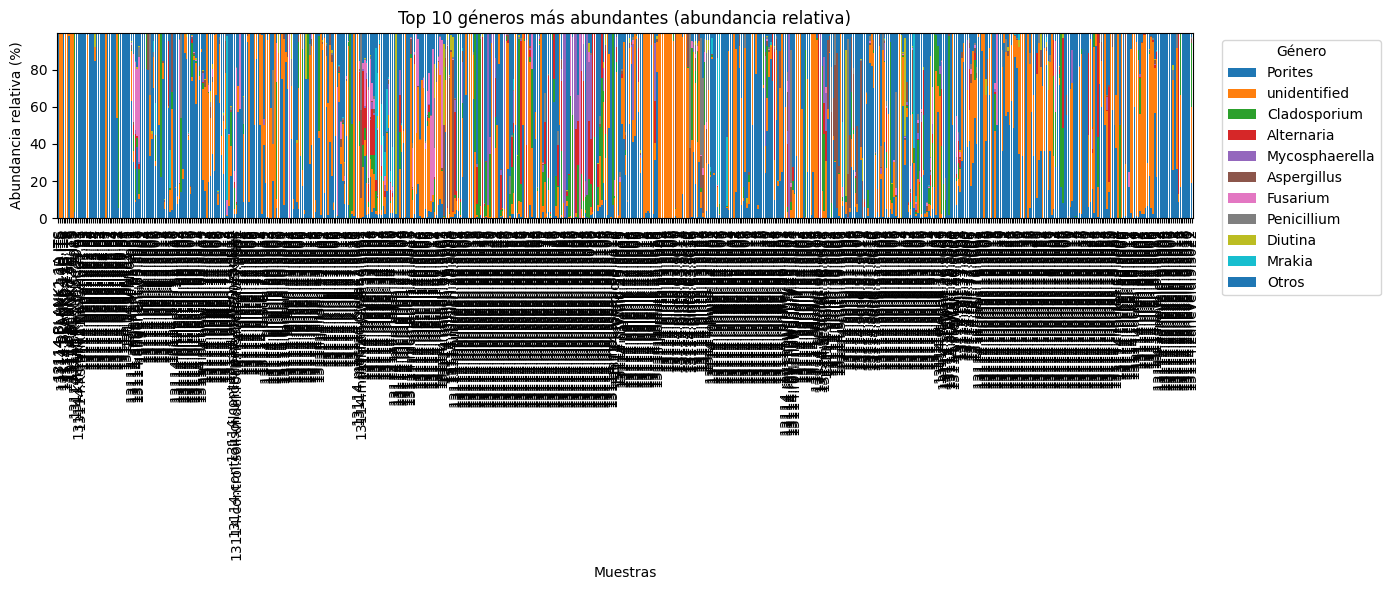

In [43]:

# 1) Abundancia relativa por muestra
genus_rel = genus_abund.drop(columns="__total__", errors="ignore") \
                       .div(genus_abund.drop(columns="__total__", errors="ignore").sum(axis=0), axis=1)

# 2) Seleccionar top 10 géneros más abundantes globalmente
top10 = genus_rel.sum(axis=1).sort_values(ascending=False).head(10).index

# 3) Agrupar: top 10 + "Otros"
genus_rel_top = genus_rel.loc[top10].copy()
otros = 1 - genus_rel_top.sum(axis=0)
genus_rel_top.loc["Otros"] = otros.clip(lower=0)

# 4) Transponer para graficar (muestras en X, géneros como colores)
df_plot = genus_rel_top.T * 100  # en %

# 5) Hacer stacked barplot
ax = df_plot.plot(kind="bar", stacked=True, figsize=(14,6), width=0.8)

plt.ylabel("Abundancia relativa (%)")
plt.xlabel("Muestras")
plt.title("Top 10 géneros más abundantes (abundancia relativa)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", title="Género")
plt.tight_layout()
plt.show()


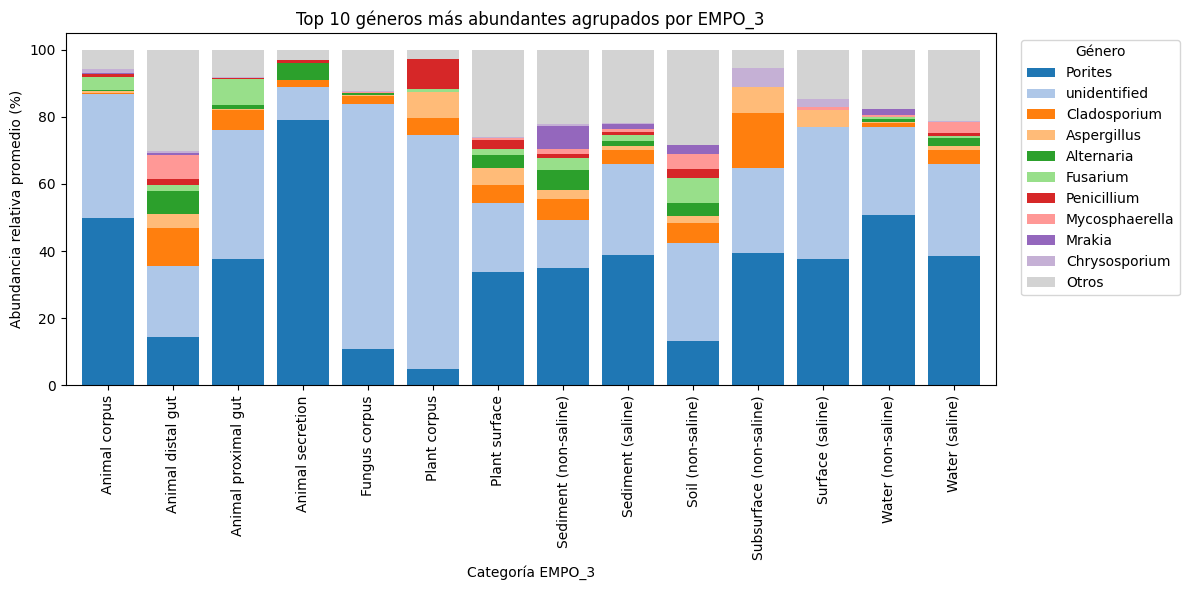

In [44]:
# 1) Mapear muestra → empo_3
# Si tu metadata está en un SampleMetadata de scikit-bio:
# meta_df = meta.to_dataframe()
# (o si ya lo tienes como DataFrame)
sample_to_empo = df_["empo_3"].to_dict()   # diccionario {sample_id: empo_3}

# 2) Alinear genus_rel con metadata
common_samples = genus_rel.columns.intersection(sample_to_empo.keys())
genus_rel_aln = genus_rel[common_samples]
empo_series = pd.Series({s: sample_to_empo[s] for s in common_samples})

# 3) Promedio de abundancia relativa por grupo EMPO
# Transponemos: muestras × géneros → agrupamos por EMPO → promediamos → regresamos
per_empo = genus_rel_aln.T.groupby(empo_series).mean().T * 100  # en %

# 4) Seleccionar los top10 géneros más abundantes globalmente
top10 = per_empo.sum(axis=1).sort_values(ascending=False).head(10).index

per_empo_top = per_empo.loc[top10].copy()
otros = 100 - per_empo_top.sum(axis=0)
per_empo_top.loc["Otros"] = otros.clip(lower=0)

# 5) Graficar stacked bar (EMPO en eje X, géneros en colores)

# Lista de colores: gris para "Otros", automático para el resto
color_list = [
    "lightgrey" if g == "Otros" else None
    for g in per_empo_top.index
]

# Filtrar None → matplotlib asigna colores por defecto
color_list = [
    c if c is not None else plt.cm.tab20(i % 20)
    for i, c in enumerate(color_list)
]

# Graficar
ax = per_empo_top.T.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    width=0.8,
    color=color_list
)

plt.ylabel("Abundancia relativa promedio (%)")
plt.xlabel("Categoría EMPO_3")
plt.title("Top 10 géneros más abundantes agrupados por EMPO_3")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", title="Género")
plt.tight_layout()
plt.show()


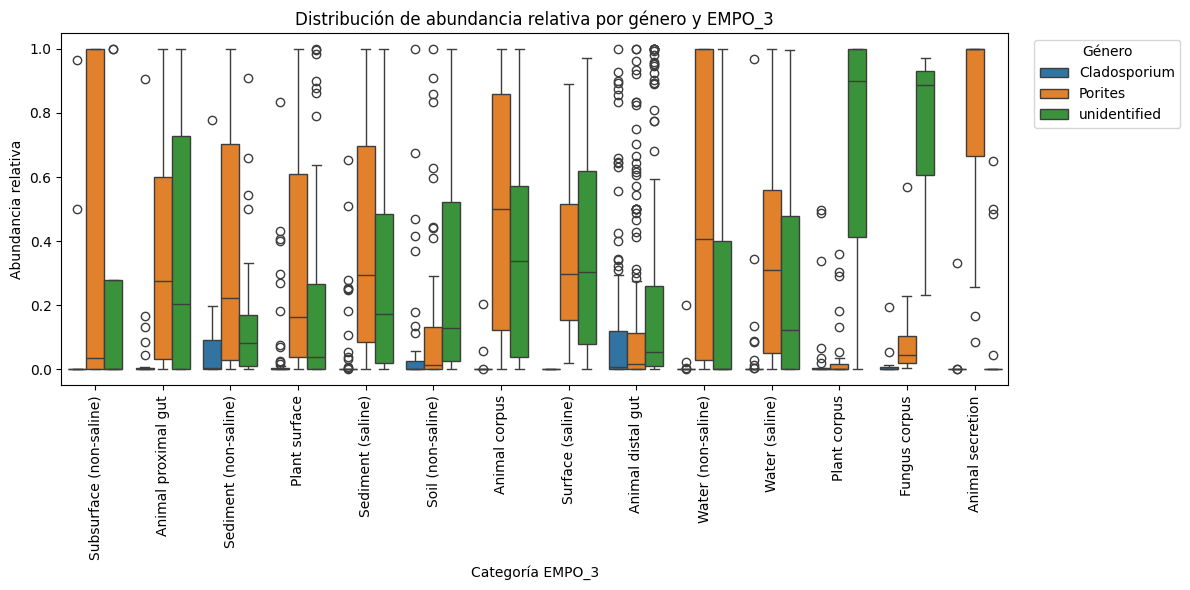

In [79]:
import seaborn as sns
# 1) Asegurar abundancia relativa por muestra (genus_rel ya lo tenías)
# genus_rel = genus_abund.drop("__total__", errors="ignore").div(...)

# 2) Top 3 géneros más abundantes globalmente
top3 = genus_rel.sum(axis=1).sort_values(ascending=False).head(3).index.tolist()

# 3) Lista de géneros de interés
genus_interest = top3
# 4) Subset de abundancias relativas solo esos géneros
subset = genus_rel.loc[genus_rel.index.intersection(genus_interest)].copy()
# 5) Pasar a formato largo (muestra, género, abundancia)
df_long = subset.T.reset_index().melt(id_vars="index", var_name="genus", value_name="rel_abund")
df_long = df_long.rename(columns={"index":"sample"})

# 6) Agregar EMPO_3 desde metadata
df_long["empo_3"] = df_long["sample"].map(sample_to_empo)

# 7) Graficar boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_long, x="empo_3", y="rel_abund", hue="genus")
plt.ylabel("Abundancia relativa")
plt.xlabel("Categoría EMPO_3")
plt.xticks(rotation=90)
plt.title("Distribución de abundancia relativa por género y EMPO_3")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", title="Género")
plt.tight_layout()
plt.show()


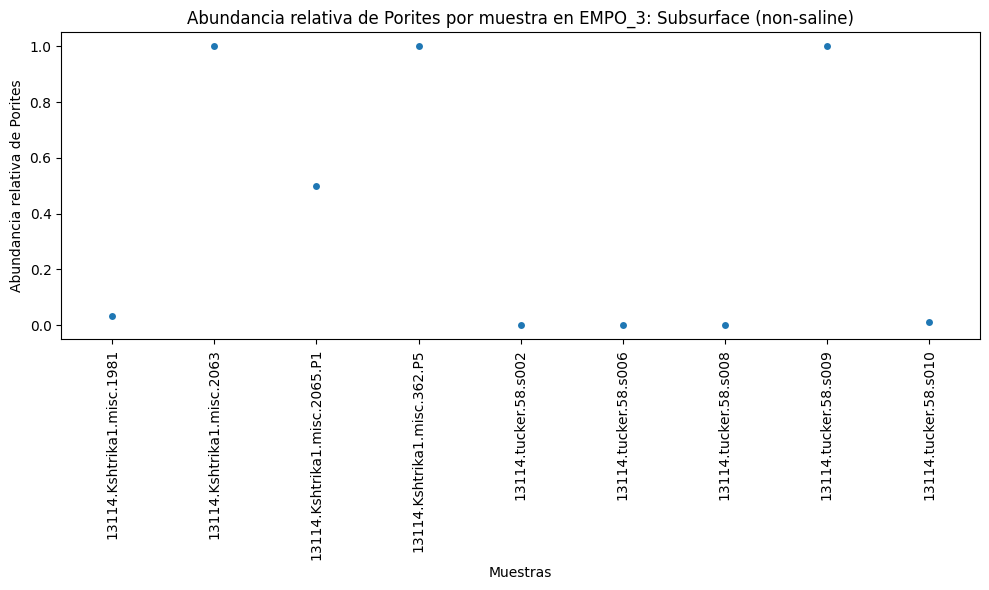

In [64]:
import seaborn as sns
# Género de interés
genus_var = "Porites"

# 1) Filtrar abundancia relativa del género
if genus_var in genus_rel.index:
    genus_rel_series = genus_rel.loc[genus_var]
else:
    raise ValueError(f"El género '{genus_var}' no está en la tabla.")

# 2) Mapear muestras a empo_3
empo_series = pd.Series(sample_to_empo)

# 3) Filtrar muestras con EMPO_3 específico y asegurarse de que estén en los datos de abundancia del género
empo_target = "Subsurface (non-saline)"
empo_samples = empo_series[empo_series == empo_target].index
common_samples = genus_rel_series.index.intersection(empo_samples)
genus_sub = genus_rel_series[common_samples]

# Crear un DataFrame para el plot con las muestras como columna
plot_df = pd.DataFrame({'Sample': genus_sub.index, 'Relative Abundance': genus_sub.values})


# 4a) Strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=plot_df, x='Sample', y='Relative Abundance', jitter=True)
plt.xlabel("Muestras")
plt.ylabel(f"Abundancia relativa de {genus_var}")
plt.title(f"Abundancia relativa de {genus_var} por muestra en EMPO_3: {empo_target}")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# # 4b) (Opcional) Boxplot solo para ese grupo
# # plt.figure(figsize=(4,6))
# # sns.boxplot(y=genus_sub)
# # plt.ylabel(f"Abundancia relativa de {genus_var}")
# # plt.title(f"Boxplot de {genus_var} en EMPO_3: {empo_target}")
# # plt.show()

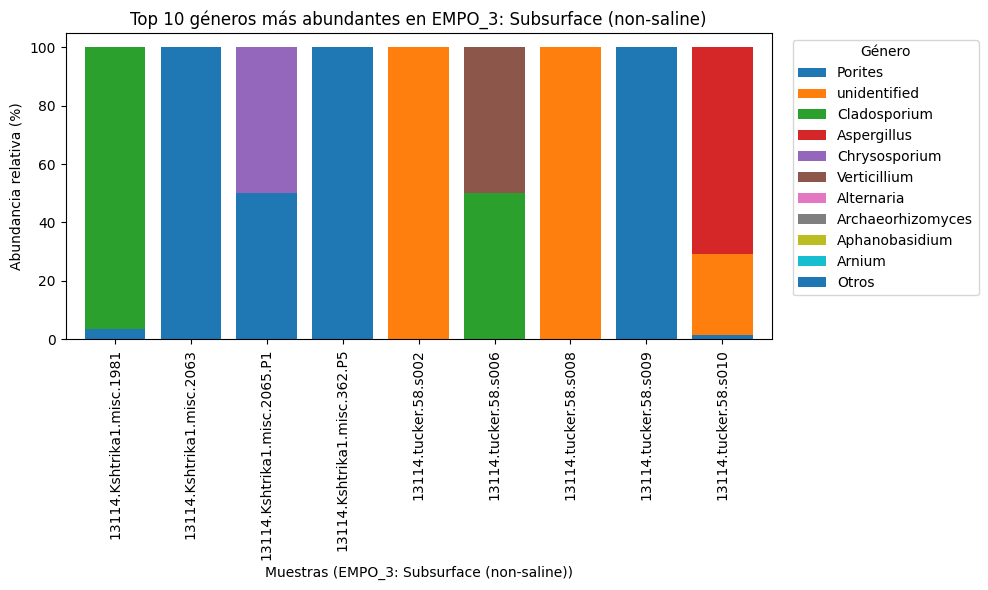

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) Filtrar muestras con EMPO_3 "Subsurface (non-saline)"
empo_target = "Subsurface (non-saline)"
empo_samples_in_meta = empo_series[empo_series == empo_target].index

# Asegurarse de que los sample IDs existan en genus_rel antes de filtrar
common_samples = genus_rel.columns.intersection(empo_samples_in_meta)
subsurface_genus_rel = genus_rel[common_samples]


# 2) Recalcular abundancia relativa dentro de este subconjunto (si es necesario)
# En este caso, genus_rel ya es relativa a cada muestra, así que no hace falta recalcular.
# Solo necesitamos asegurarnos de que las sumas por columna son 1 (o cerca de 1)
# print(subsurface_genus_rel.sum(axis=0).head()) # Para verificar

# 3) Seleccionar top 10 géneros más abundantes en este subconjunto
# Solo calcular si hay muestras en el subconjunto
if not subsurface_genus_rel.empty:
    top10_subsurface = subsurface_genus_rel.sum(axis=1).sort_values(ascending=False).head(10).index

    # 4) Agrupar: top 10 + "Otros"
    subsurface_genus_rel_top = subsurface_genus_rel.loc[top10_subsurface].copy()
    otros_subsurface = 1 - subsurface_genus_rel_top.sum(axis=0)
    subsurface_genus_rel_top.loc["Otros"] = otros_subsurface.clip(lower=0)

    # 5) Transponer para graficar (muestras en X, géneros como colores)
    df_plot_subsurface = subsurface_genus_rel_top.T * 100 # en %

    # 6) Hacer stacked barplot
    ax = df_plot_subsurface.plot(kind="bar", stacked=True, figsize=(10,6), width=0.8)

    plt.ylabel("Abundancia relativa (%)")
    plt.xlabel(f"Muestras (EMPO_3: {empo_target})")
    plt.title(f"Top 10 géneros más abundantes en EMPO_3: {empo_target}")
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", title="Género")
    plt.tight_layout()
    plt.show()
else:
    print(f"No hay muestras con la categoría EMPO_3 '{empo_target}' en los datos de abundancia.")

In [72]:
# Filtrar filtered_meta_df para incluir solo las muestras en common_samples (Subsurface non-saline)
subsurface_meta_df = filtered_meta_df.loc[common_samples]

# Mostrar los metadatos filtrados
print(f"Metadatos para muestras con EMPO_3: {empo_target}")
display(subsurface_meta_df)

Metadatos para muestras con EMPO_3: Subsurface (non-saline)


,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
13114.Kshtrika1.misc.1981,Kshtrika1.misc.1981,oil,3/30/16 0:00,USA - New Mexico,Missing: Restricted access,subsurface oil from Biota,1033.4,Kshtrika,1.0,Kshtrika1,...,oil reservior,petroleum,misc environment,United States of America:State of New Mexico:C...,Kshtrika1.misc.1981,NaN,32.80000,-104.40000,B2014.1/B2016.1,oil field metagenome
13114.Kshtrika1.misc.2063,Kshtrika1.misc.2063,oil,1/13/16 0:00,USA - Texas,Missing: Restricted access,subsurface oil from Biota,845.9,Kshtrika,1.0,Kshtrika1,...,oil reservior,petroleum,misc environment,United States of America:State of Texas:City o...,Kshtrika1.misc.2063,NaN,32.00000,-102.10000,B2014.1/B2016.1,oil field metagenome
13114.Kshtrika1.misc.2065.P1,Kshtrika1.misc.2065.P1,oil,1/13/16 0:00,USA - Texas,Missing: Restricted access,subsurface oil from Biota,845.9,Kshtrika,1.0,Kshtrika1,...,oil reservior,petroleum,misc environment,United States of America:State of Texas:City o...,Kshtrika1.misc.2065,NaN,32.00000,-102.10000,B2014.1/B2016.1,oil field metagenome
13114.Kshtrika1.misc.362.P5,Kshtrika1.misc.362.P5,oil,7/30/16 0:00,USA - New Mexico,Missing: Restricted access,subsurface oil from Biota,1033.4,Kshtrika,1.0,Kshtrika1,...,oil reservior,petroleum,misc environment,United States of America:State of New Mexico:C...,Kshtrika1.misc.362,NaN,32.80000,-104.40000,B2014.1/B2016.1,oil field metagenome
13114.tucker.58.s002,Tucker58.DOE.coal.AP1.234,coal,03/12/2015 0:00,USA - West Virginia,71.3,Central Appalachian,237.4,Tucker,58.0,Tucker58,...,mine,rock,misc environment,United States of America:State of West Virginia,DOE.coal.AP1.234,NaN,37.97748,-81.39607,DOE coal,coal metagenome
13114.tucker.58.s006,Tucker58.DOE.coal.MSU.Flowers.Goodale.378,coal,07/03/2005 0:00,USA - Illinois,115.3,PRB,952.0,Tucker,58.0,Tucker58,...,mine,rock,misc environment,United States of America:State of Illinois,DOE.coal.MSU. Flowers.Goodale.378,NaN,45.43525,-106.39197,DOE coal,coal metagenome
13114.tucker.58.s008,Tucker58.DOE.coal.MSU.Nance,coal,07/03/2005 0:00,USA - Illinois,62.5,PRB,952.0,Tucker,58.0,Tucker58,...,mine,rock,misc environment,United States of America:State of Illinois,DOE.coal.MSU.Nance,NaN,45.43525,-106.39197,DOE coal,coal metagenome
13114.tucker.58.s009,Tucker58.DOE.coal.SIU,coal,10/28/15 0:00,USA - Illinois,240,no description,952.0,Tucker,58.0,Tucker58,...,mine,rock,misc environment,United States of America:State of Illinois,DOE.coal.SIU,NaN,38.60000,-87.80000,DOE coal,coal metagenome
13114.tucker.58.s010,Tucker58.DOE.coal.Terrett,coal,07/03/2005 0:00,USA - Illinois,156.8,PRB,952.0,Tucker,58.0,Tucker58,...,mine,rock,misc environment,United States of America:State of Illinois,DOE.coal.MSU.Terrett,NaN,45.43525,-106.39197,DOE coal,coal metagenome


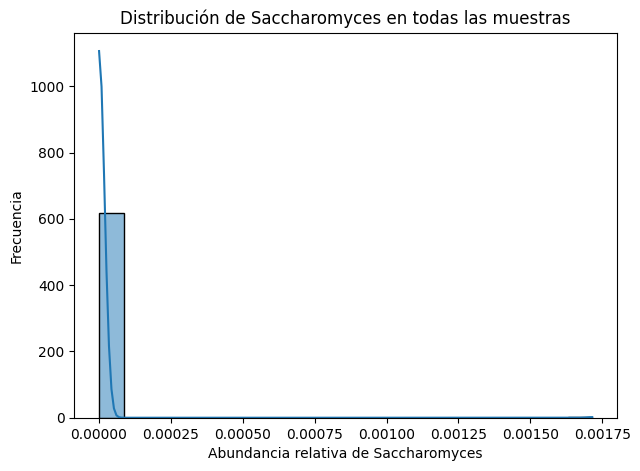

In [73]:
import seaborn as sns

# Género de interés
genus_var = "Saccharomyces"

# 1) Filtrar abundancia relativa del género en todas las muestras
if genus_var in genus_rel.index:
    genus_rel_series_saccharomyces = genus_rel.loc[genus_var]
else:
    print(f"El género '{genus_var}' no está en la tabla de abundancia relativa.")
    genus_rel_series_saccharomyces = pd.Series([]) # Create an empty series if not found


# 2) Histograma de la distribución en todas las muestras
if not genus_rel_series_saccharomyces.empty:
    plt.figure(figsize=(7,5))
    sns.histplot(genus_rel_series_saccharomyces, bins=20, kde=True)
    plt.xlabel(f"Abundancia relativa de {genus_var}")
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {genus_var} en todas las muestras")
    plt.show()
else:
    print(f"No hay datos de abundancia para el género '{genus_var}' en ninguna muestra.")

In [74]:
# Género de interés
genus_var = "Saccharomyces"

# 1) Filtrar abundancia relativa del género en todas las muestras
if genus_var in genus_rel.index:
    genus_rel_series_saccharomyces = genus_rel.loc[genus_var]
else:
    print(f"El género '{genus_var}' no está en la tabla de abundancia relativa.")
    genus_rel_series_saccharomyces = pd.Series([]) # Create an empty series if not found

# 2) Mostrar las 10 muestras con mayor abundancia relativa
if not genus_rel_series_saccharomyces.empty:
    top10_saccharomyces = genus_rel_series_saccharomyces.sort_values(ascending=False).head(10)
    print(f"Top 10 muestras con mayor abundancia relativa de {genus_var}:")
    display(top10_saccharomyces)
else:
    print(f"No hay datos de abundancia para el género '{genus_var}' para mostrar el top 10.")

Top 10 muestras con mayor abundancia relativa de Saccharomyces:


,Saccharomyces
13114.angenent.65.s007,0.001715
13114.sandin.54.s006,0.000000
13114.sandin.54.s007,0.000000
13114.sandin.54.s008,0.000000
13114.sandin.54.s010,0.000000
13114.sandin.54.s014,0.000000
13114.sandin.54.s015,0.000000
13114.schmidt.56.s005,0.000000
13114.schmidt.56.s009,0.000000
13114.palenik.42.s003,0.000000


In [75]:
# Sample ID to retrieve metadata for
sample_id_to_show = "13114.angenent.65.s007"

# Check if the sample ID exists in the filtered metadata DataFrame
if sample_id_to_show in filtered_meta_df.index:
    # Display the metadata for the specific sample
    print(f"Metadatos para la muestra: {sample_id_to_show}")
    display(filtered_meta_df.loc[[sample_id_to_show]])
else:
    print(f"La muestra con ID '{sample_id_to_show}' no se encuentra en los metadatos filtrados.")

Metadatos para la muestra: 13114.angenent.65.s007


,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.angenent.65.s007,Angenent65.misc.1722,bioreactor sludge,1/13/15 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65.0,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.1722,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome


### Metadata column

In [ ]:
meta

In [49]:
# Convertir la metadata a un DataFrame de pandas
meta_df = meta.to_dataframe()

# Filtrar el DataFrame de metadata para que solo contenga los sample IDs presentes en filtered_table
filtered_meta_df = meta_df.loc[filtered_table.ids('sample')]

# Mostrar la forma de la metadata filtrada
print(f"Metadata filtrada: {filtered_meta_df.shape}")
display(filtered_meta_df.head())

Metadata filtrada: (582, 33)


,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.Kshtrika1.misc.1981,Kshtrika1.misc.1981,oil,3/30/16 0:00,USA - New Mexico,Missing: Restricted access,subsurface oil from Biota,1033.4,Kshtrika,1.0,Kshtrika1,...,oil reservior,petroleum,misc environment,United States of America:State of New Mexico:C...,Kshtrika1.misc.1981,NaN,32.80,-104.4,B2014.1/B2016.1,oil field metagenome
13114.Kshtrika1.misc.2063,Kshtrika1.misc.2063,oil,1/13/16 0:00,USA - Texas,Missing: Restricted access,subsurface oil from Biota,845.9,Kshtrika,1.0,Kshtrika1,...,oil reservior,petroleum,misc environment,United States of America:State of Texas:City o...,Kshtrika1.misc.2063,NaN,32.00,-102.1,B2014.1/B2016.1,oil field metagenome
13114.Kshtrika1.misc.2065.P1,Kshtrika1.misc.2065.P1,oil,1/13/16 0:00,USA - Texas,Missing: Restricted access,subsurface oil from Biota,845.9,Kshtrika,1.0,Kshtrika1,...,oil reservior,petroleum,misc environment,United States of America:State of Texas:City o...,Kshtrika1.misc.2065,NaN,32.00,-102.1,B2014.1/B2016.1,oil field metagenome
13114.Kshtrika1.misc.362.P5,Kshtrika1.misc.362.P5,oil,7/30/16 0:00,USA - New Mexico,Missing: Restricted access,subsurface oil from Biota,1033.4,Kshtrika,1.0,Kshtrika1,...,oil reservior,petroleum,misc environment,United States of America:State of New Mexico:C...,Kshtrika1.misc.362,NaN,32.80,-104.4,B2014.1/B2016.1,oil field metagenome
13114.angenent.65.s001,Angenent65.misc.104,bioreactor sludge,08/09/2011 0:00,USA - New York,NaN,Corn Beer Fermentation Bioreactor Biomass,123.0,Angenent,65.0,Angenent65,...,anaerobic bioreactor,anaerobic sludge,host-associated,United States of America:State of New York:Cit...,LTA.misc.104,NaN,42.44,-76.5,Corn Beer Fermentation Bioreactor,bioreactor metagenome


In [78]:
import plotly.graph_objects as go

# Asegurarse de que la metadata filtrada está en un DataFrame
if not isinstance(filtered_meta, pd.DataFrame):
    filtered_meta_df = filtered_meta.to_dataframe()
else:
    filtered_meta_df = filtered_meta

# Contar las transiciones entre EMPO_1, EMPO_2 y EMPO_3
transitions_1_2 = filtered_meta_df.groupby(['empo_1', 'empo_2']).size().reset_index(name='count')
transitions_2_3 = filtered_meta_df.groupby(['empo_2', 'empo_3']).size().reset_index(name='count')

# Calculate counts for each EMPO_3 node
empo_3_counts = transitions_2_3.groupby('empo_3')['count'].sum().reset_index(name='total_count')
empo_3_count_dict = empo_3_counts.set_index('empo_3')['total_count'].to_dict()

# Prepare the data for the Sankey plot
# Create unique nodes for EMPO_1, EMPO_2 and EMPO_3
nodes_1 = transitions_1_2['empo_1'].unique()
nodes_2 = pd.concat([transitions_1_2['empo_2'], transitions_2_3['empo_2']]).unique()
nodes_3 = transitions_2_3['empo_3'].unique()

nodes = np.concatenate([nodes_1, nodes_2, nodes_3])
node_dict = {node: i for i, node in enumerate(nodes)}

# Add counts to EMPO_3 labels
labeled_nodes = [f"{empo_3_count_dict.get(node, 0)} {node}" if node in nodes_3 else node for node in nodes]


# Create links for the transition from EMPO_1 to EMPO_2
source_1_2 = transitions_1_2['empo_1'].map(node_dict)
target_1_2 = transitions_1_2['empo_2'].map(node_dict)
value_1_2 = transitions_1_2['count']

# Create links for the transition from EMPO_2 to EMPO_3
source_2_3 = transitions_2_3['empo_2'].map(node_dict)
target_2_3 = transitions_2_3['empo_3'].map(node_dict)
value_2_3 = transitions_2_3['count']

# Combine sources, targets and values for all links
source = pd.concat([source_1_2, source_2_3])
target = pd.concat([target_1_2, target_2_3])
value = pd.concat([value_1_2, value_2_3])


# Create the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labeled_nodes,
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Distribución de Muestras entre EMPO_1, EMPO_2 y EMPO_3", font_size=10)
fig.show()

In [59]:
import plotly.express as px

# Contar el número de muestras en cada ubicación única
location_counts = filtered_meta_df.groupby(['latitude', 'longitude']).size().reset_index(name='sample_count')

# Unir los conteos de vuelta al DataFrame original (esto puede duplicar filas si hay múltiples muestras con los mismos coords)
# Una mejor aproximación es usar directly the location_counts DataFrame for plotting
# filtered_meta_df_with_counts = filtered_meta_df.merge(location_counts, on=['latitude', 'longitude'], how='left')


# Crear un gráfico de dispersión en un mapa usando latitude y longitude, con tamaño basado en el conteo
fig = px.scatter_geo(location_counts,  # Usar el DataFrame con los conteos de ubicación
                     lat='latitude',
                     lon='longitude',
                     size='sample_count', # Usar el conteo de muestras para el tamaño del punto
                     hover_name='sample_count', # Mostrar el conteo al pasar el mouse
                     title='Ubicación de las Muestras en el Mapa (Tamaño indica número de muestras)',
                     size_max=15 # Ajustar el tamaño máximo de los puntos si es necesario
                    )

fig.show()

In [58]:
print(f"Número de muestras en filtered_meta_df: {filtered_meta_df.shape[0]}")
print(f"Valores no nulos en 'latitude': {filtered_meta_df['latitude'].count()}")
print(f"Valores no nulos en 'longitude': {filtered_meta_df['longitude'].count()}")

Número de muestras en filtered_meta_df: 582
Valores no nulos en 'latitude': 582
Valores no nulos en 'longitude': 582


One can extract a metadata column by its name. The output is a [`MetadataColumn`](https://scikit.bio/docs/latest/generated/skbio.metadata.MetadataColumn.html) object.

For example, column `empo_2` describes the level 2 EMP Ontology ([EMPO](https://earthmicrobiome.org/protocols-and-standards/empo/)) of the environment from which the sample was collected.

In [51]:
empo_2 = filtered_meta.get_column('empo_2')
empo_2

<CategoricalMetadataColumn name='empo_2' id_count=582>

Likewise, a metadata column can be converted into a Pandas series.

In [16]:
s_ = empo_2.to_series()
s_

,empo_2
sample_name,
13114.angenent.65.s001,Animal
13114.angenent.65.s002,Animal
13114.angenent.65.s003,Animal
13114.angenent.65.s004,Animal
13114.angenent.65.s005,Animal
...,...
13114.zaneveld.9.s018,Animal
13114.zaneveld.9.s019,Animal
13114.zaneveld.9.s020,Animal


Using Pandas, one can further explore the distribution of values.

In [52]:
empo_2_freqs = s_.value_counts()
empo_2_freqs

,count
empo_2,
Non-saline,343
Animal,301
Plant,115
Saline,109
Fungus,12


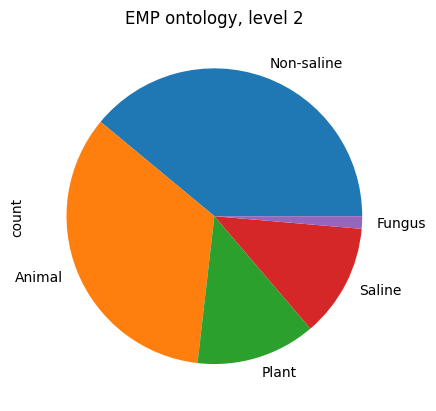

In [53]:
empo_2_freqs.plot.pie(title='EMP ontology, level 2');

## Summary

This section navigated the components of EMP500, a multi-omic dataset: sample metadata, data tables, and feature metadata (taxonomy, phylogeny, functional ontology, etc.). It discussed the various omic data types included in this demo dataset and beyond. It demonstrated how to use scikit-bio and other Python libraries to parse and explore these files. We will perform analysis of these data using scikit-bio in the following sections.